In [63]:
import requests
import json
import pprint
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt

base="USD"

# required currency for plot
out_curr1="CAD"
out_curr2="COP"
out_curr3="INR"
# exchange data from a date
start_date=date.today() - timedelta(days=30)

# exchange data till a date
end_date=date.today()

url1 = 'https://api.exchangerate.host/timeseries?base={0}&start_date={1}&end_date={2}&symbols={3}'.format(base,start_date,end_date,out_curr1)
url2 = 'https://api.exchangerate.host/timeseries?base={0}&start_date={1}&end_date={2}&symbols={3}'.format(base,start_date,end_date,out_curr2)
url3 = 'https://api.exchangerate.host/timeseries?base={0}&start_date={1}&end_date={2}&symbols={3}'.format(base,start_date,end_date,out_curr3)
response1 = requests.get(url1)
response2 = requests.get(url2)
response3 = requests.get(url3)
data1 = response1.json()
data2 = response2.json()
data3 = response3.json()
print(data1)

{'motd': {'msg': 'If you or your company use this project or like what we doing, please consider backing us so we can continue maintaining and evolving this project.', 'url': 'https://exchangerate.host/#/donate'}, 'success': True, 'timeseries': True, 'base': 'USD', 'start_date': '2022-07-10', 'end_date': '2022-08-09', 'rates': {'2022-07-10': {'CAD': 1.295165}, '2022-07-11': {'CAD': 1.301489}, '2022-07-12': {'CAD': 1.302786}, '2022-07-13': {'CAD': 1.299232}, '2022-07-14': {'CAD': 1.311285}, '2022-07-15': {'CAD': 1.302701}, '2022-07-16': {'CAD': 1.303812}, '2022-07-17': {'CAD': 1.30203}, '2022-07-18': {'CAD': 1.298174}, '2022-07-19': {'CAD': 1.285576}, '2022-07-20': {'CAD': 1.289586}, '2022-07-21': {'CAD': 1.287772}, '2022-07-22': {'CAD': 1.292125}, '2022-07-23': {'CAD': 1.291757}, '2022-07-24': {'CAD': 1.291436}, '2022-07-25': {'CAD': 1.285891}, '2022-07-26': {'CAD': 1.287003}, '2022-07-27': {'CAD': 1.281687}, '2022-07-28': {'CAD': 1.279855}, '2022-07-29': {'CAD': 1.278481}, '2022-07-30

In [65]:
rates1=[]
rates2=[]
rates3=[]
# extract dates and rates from each item of dictionary or json in the above created list
for i,j in data1["rates"].items():
      rates1.append(['CAD',i,j[out_curr]])

In [66]:
df=pd.DataFrame(rates1)
# define column names explicitely
df.columns=["Curr","date","rate"]
df

,Curr,date,rate
0,CAD,2022-07-10,1.295165
1,CAD,2022-07-11,1.301489
2,CAD,2022-07-12,1.302786
3,CAD,2022-07-13,1.299232
4,CAD,2022-07-14,1.311285
5,CAD,2022-07-15,1.302701
6,CAD,2022-07-16,1.303812
7,CAD,2022-07-17,1.302030
8,CAD,2022-07-18,1.298174
9,CAD,2022-07-19,1.285576


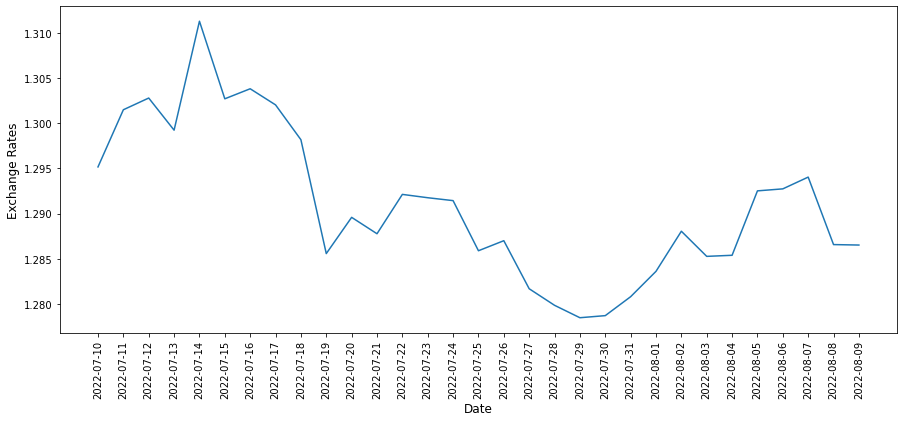

In [67]:
# Put dates on the x-axis
x = df['date']
# Put exchange rates on the y-axis
y = df['rate']
# Specify the width and height of a figure in unit inches
fig = plt.figure(figsize=(15,6))
# Rotate the date ticks on the x-axis by degrees
plt.xticks(rotation=90)
# Set title on the axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Exchange Rates', fontsize=12)
# Plot the data
plt.plot(x,y)